In [1]:
import os
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Load the csv file to pandas dataframe
df = pd.read_csv(os.path.join(dirname, filename))

print (df.shape) #1500 rows and 9 columns
print (df.head)

/kaggle/input/cancer-prediction-dataset/The_Cancer_data_1500_V2.csv
(1500, 9)
<bound method NDFrame.head of       Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0      58       1  16.085313        0            1          8.146251   
1      71       0  30.828784        0            1          9.361630   
2      48       1  38.785084        0            2          5.135179   
3      34       0  30.040296        0            0          9.502792   
4      62       1  35.479721        0            0          5.356890   
...   ...     ...        ...      ...          ...               ...   
1495   62       1  25.090025        0            0          9.892167   
1496   31       0  33.447125        0            1          1.668297   
1497   63       1  32.613861        1            1          0.466848   
1498   55       0  25.568216        0            0          7.795317   
1499   67       1  23.663104        0            0          2.525860   

      AlcoholIntake  Cancer

In [2]:
#convert dataframe to numpy
import numpy as np
X = df.drop(['Diagnosis'], axis =1)
#selecting the target value and labelling it under 'Y' 
Y = df['Diagnosis']

print ('The shape of X is', X.shape)
print ('The shape of Y (target value) is', Y.shape)

print ('The first 5 sample elements',X[:5])
print ('The first 5 sample elements (target value) ',Y[:5])

The shape of X is (1500, 8)
The shape of Y (target value) is (1500,)
The first 5 sample elements    Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  
0       4.148219              1  
1       3.519683              0  
2       4.728368              0  
3       2.044636              0  
4       3.309849              0  
The first 5 sample elements (target value)  0    1
1    0
2    1
3    0
4    1
Name: Diagnosis, dtype: int64


In [3]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

print ('Training dataset size: ',X_train.shape)
print ('Test dataset size: ', X_test.shape)
print ('Training target size: ', Y_train.shape)
print ('Test target size: ', Y_test.shape)

Training dataset size:  (1200, 8)
Test dataset size:  (300, 8)
Training target size:  (1200,)
Test target size:  (300,)


## We can see the X_train and X_test dataset has multiple features with different levels of scaling values and they had to be under similar scale hence we perform standardization.

## If we do not perform standardization then the features with larger scale can dominate the optimization process.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_stdTrain = scaler.fit_transform(X_train)
X_stdTest = scaler.transform(X_test)

print ('Before Standardization: ', X_train[:1])
print ('After Standardization: ', X_stdTrain[:1])


Before Standardization:        Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
1116   46       1  30.193803        0            1          7.111218   

      AlcoholIntake  CancerHistory  
1116       2.770849              1  
After Standardization:  [[-0.25093354  1.01342342  0.37116252 -0.60173793  0.6956471   0.77101162
   0.24469577  2.42828164]]


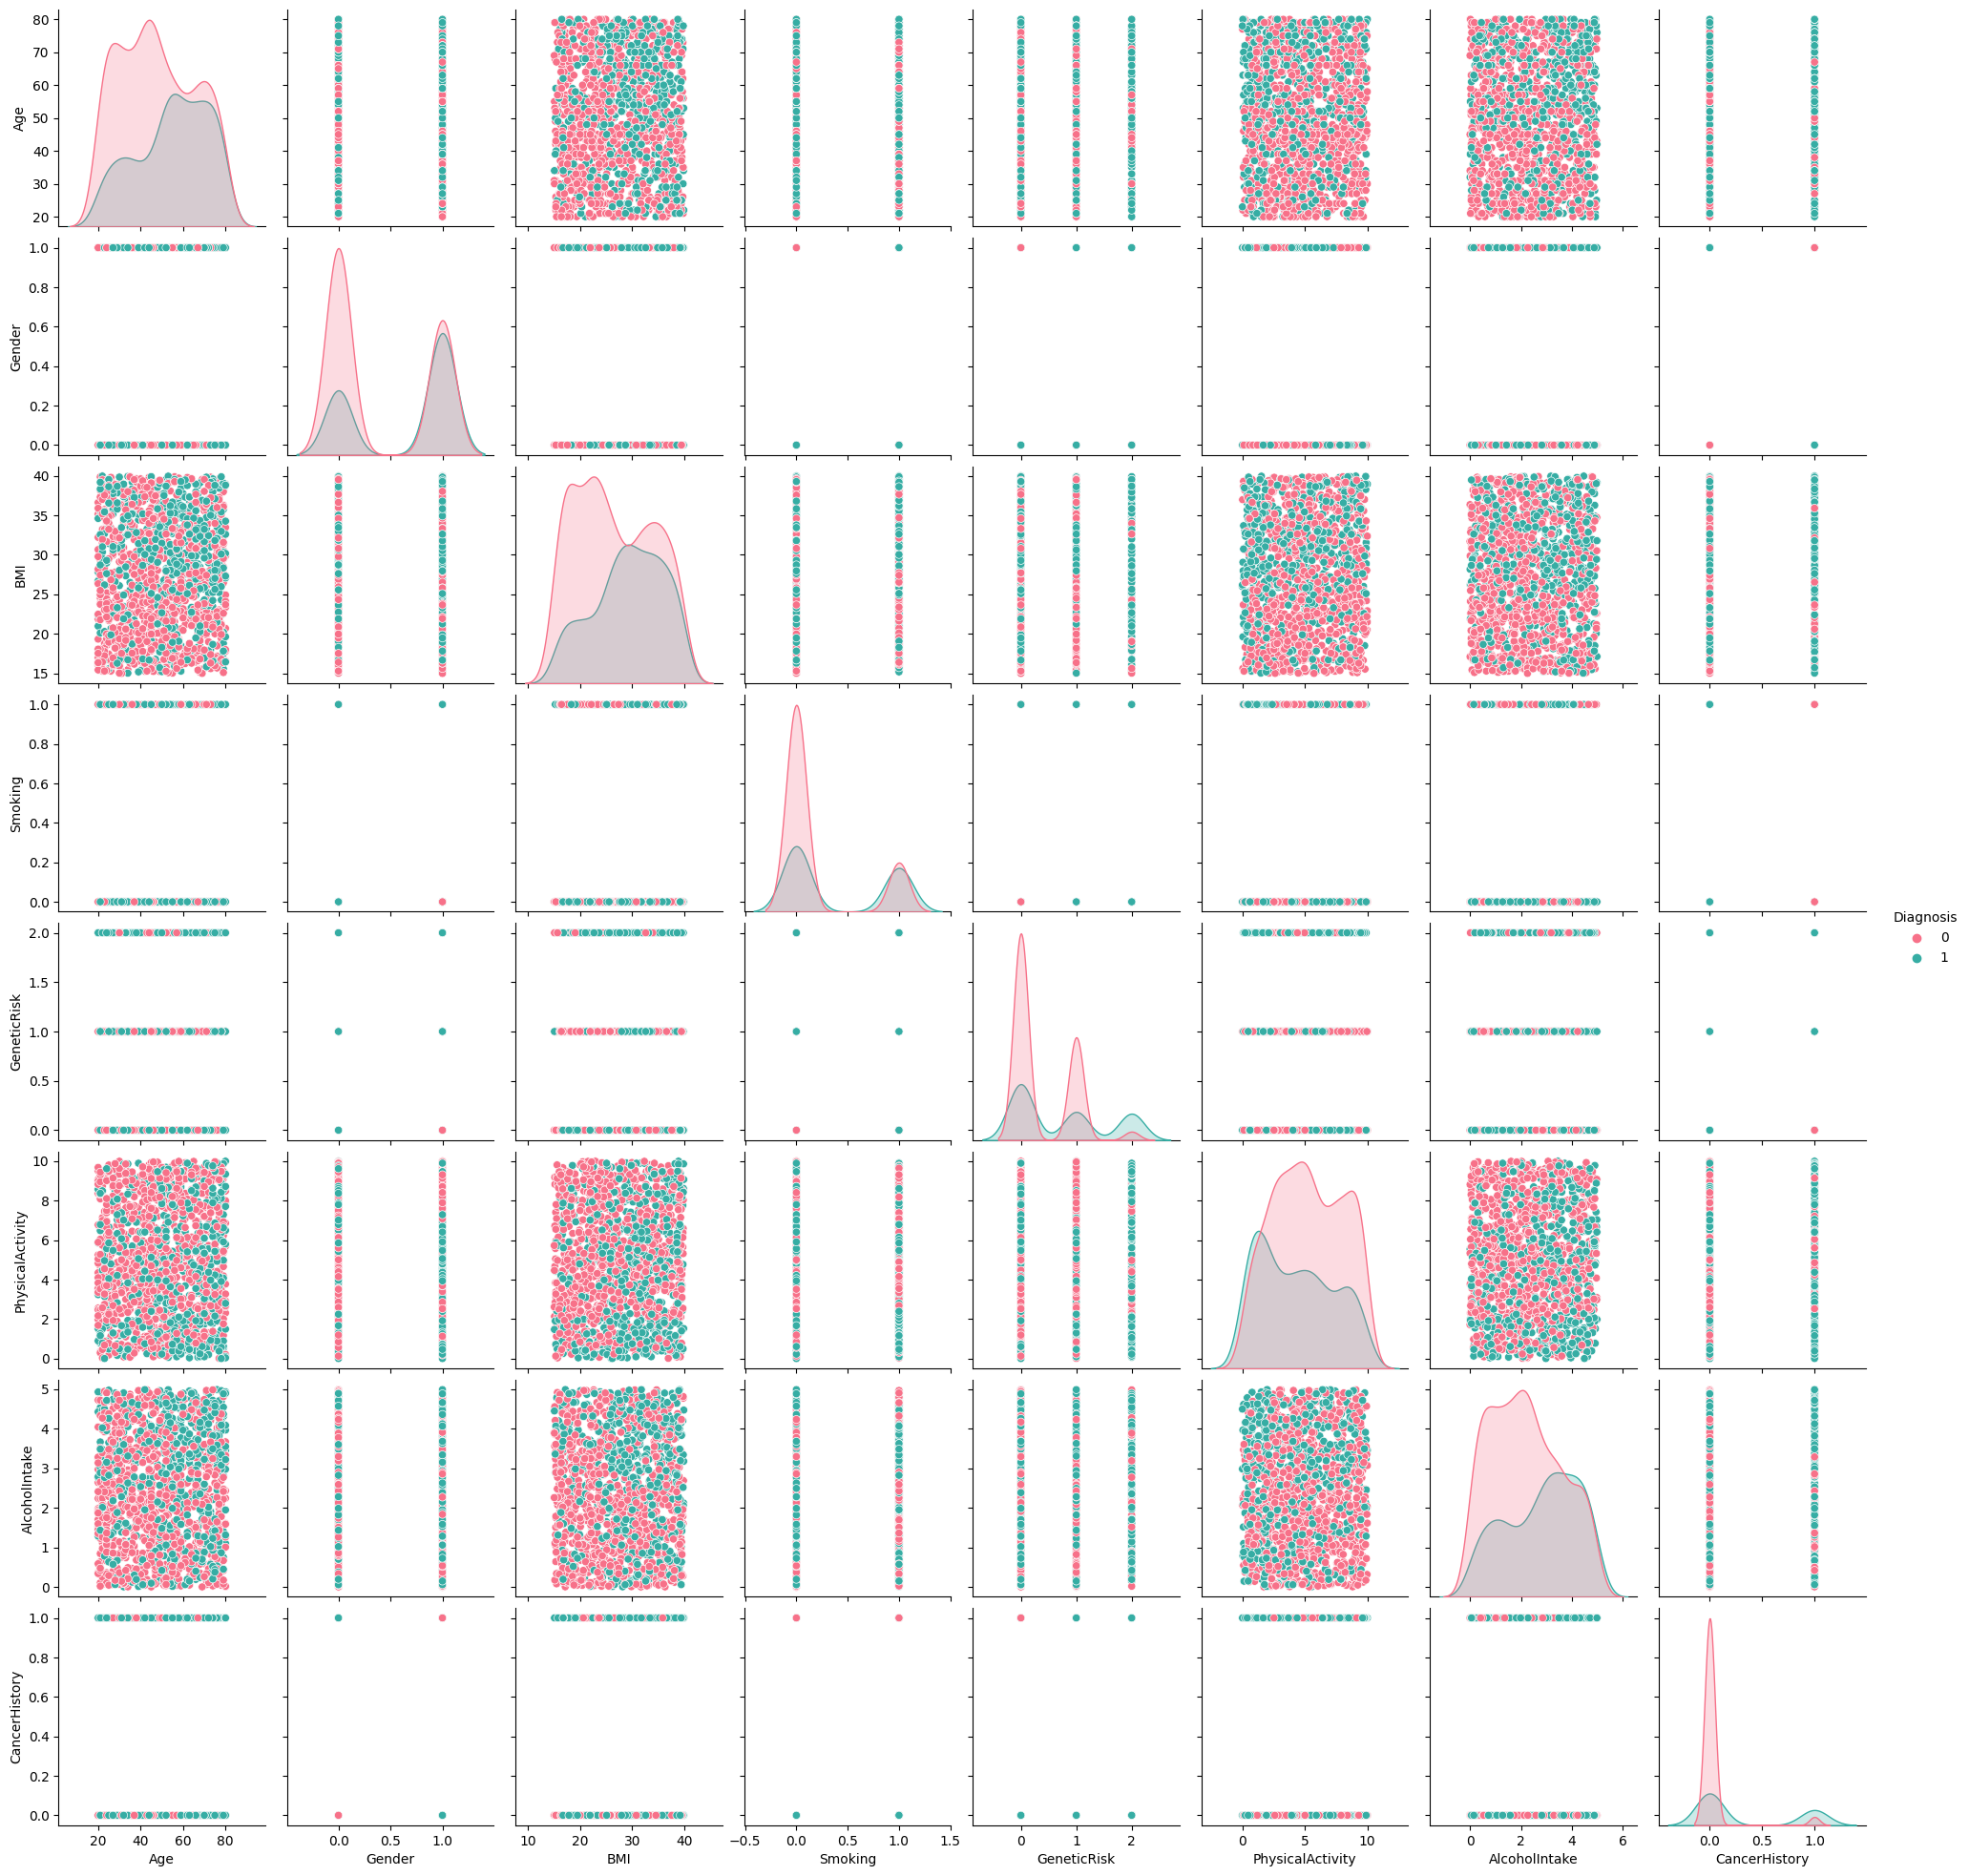

In [5]:
import seaborn as sns
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
sns.pairplot(df,palette='husl', hue = 'Diagnosis')


### Tried with Logistic regression algorithm and calculating the accuracy score

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model = LogisticRegression()
model.fit(X_stdTrain, Y_train)

y_pred = model.predict(X_stdTest)
accuracy = accuracy_score(Y_test, y_pred)

print (accuracy)

0.8533333333333334


### Lets Try with Decision Trees and XGBoost

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#define the parameter grid
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 9 ,11, 13],
    'min_samples_split' : [2]
}
#initialize the classifier
model = DecisionTreeClassifier()

#initialize gridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)

#Fit the model to train data
grid_search.fit (X_stdTrain, Y_train)
#Get the best model 
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_stdTest)

#calculate the accuracy
accuracy = accuracy_score (Y_test, y_pred)
print(accuracy)

0.87


### Lets try with RandomForest algorithm

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid_randomForest = {
    'n_estimators' : [100, 200, 300, 400],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 9, 11, 13]
}
model = RandomForestClassifier()

#initialize gridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = param_grid_randomForest, cv = 5)

#Fit the model to train data
grid_search.fit (X_stdTrain, Y_train)
#Get the best model 
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_stdTest)

#calculate the accuracy
accuracy = accuracy_score (Y_test, y_pred)
print(accuracy)

0.9166666666666666
